## Ví dụ 1: 

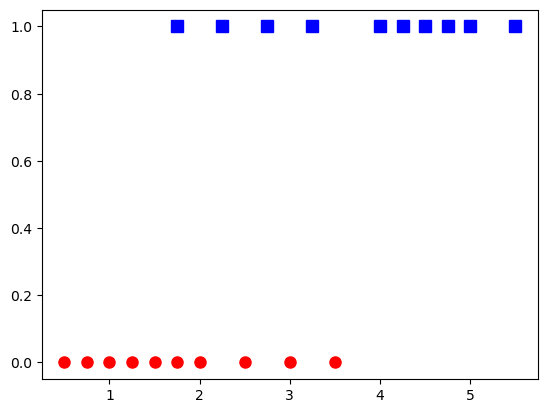

In [67]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# load data
np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,  
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]) 
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]) 

# extended data by adding a column of 1s (x0 = 1)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis= 0)
# visulazion data

X0 = X[1, np.where(y==0)][0]
y0 = y[np.where(y==0)]
X1 = X[1, np.where(y==1)][0]
y1 = y[np.where(y==1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.show()

In [68]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

In [69]:
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
# method to calculate model logistic regression by Stochastic Gradient Descent method
# eta: learning rate; tol: tolerance; max_count: maximum iterates
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
# loop of stochastic gradient descent
    while count < max_count:
        # shuffle the order of data (for stochastic gradient descent).
        # and put into mix_id
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [70]:
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.092695  ]
 [ 1.55277242]]


In [71]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]


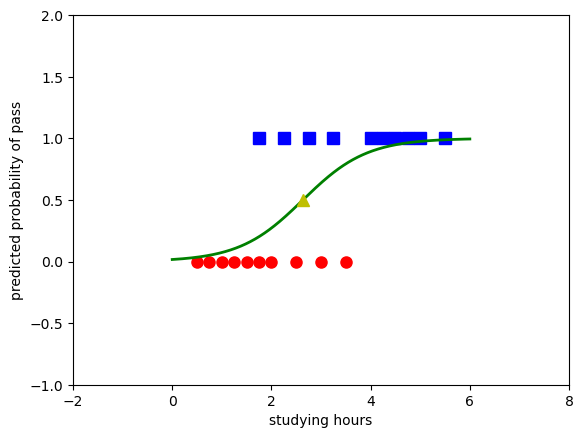

In [72]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

In [73]:
test = [2.45, 1.85, 3.75, 3.21, 4.05]

In [74]:
def predict(w_best, x):
    x = np.array([[x]
                 ])
    x = np.concatenate((np.ones((1, x.shape[1])),x),axis = 0)
    y = sigmoid(np.dot(w_best.T, x))
    if y > 0.5: 
        return 1
    else:
        return 0

In [75]:
def predicts(w_best, xs):
    c = []
    for x in xs:
        
        c.append(predict(w_best,x))
    print(c)

In [17]:
print(predicts(w[-1],t
               est))

[0, 0, 1, 1, 1]
None


## Ví dụ 2: 

In [2]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [19]:
# generate list of data points
np.random.seed(22)
means = [[2,2], [4,2]]
cov = [[.7,0], [0,.7]]
N = 20
X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

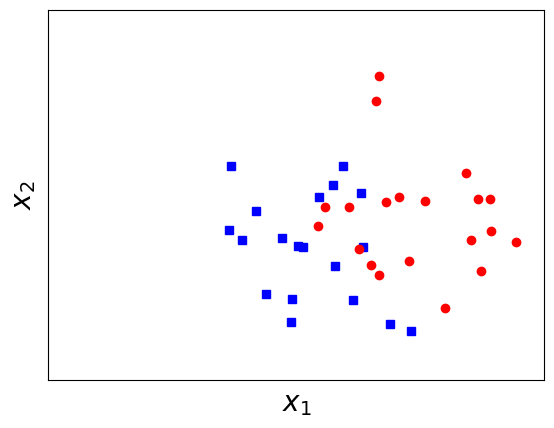

In [20]:
# visualazion data
plt.plot(X1[:,0], X1[:, 1], 'bs', alpha = 1)
plt.plot(X2[:,0], X2[:, 1], 'ro', alpha = 1)
plt.axis('equal')
plt.xlim(0,4)
plt.ylim(0,5)

# hide ticks
cur_axes = plt.gca() 
cur_axes.axes.get_xaxis().set_ticks([]) 
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20) 
plt.ylabel('$x_2$', fontsize = 20)

# save the figure to an image first   
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300) 
plt.show()

In [21]:
# sigmoid method: s(z)
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [22]:
# logistic_sigmoid_resgession method
def logistic_sigmoid_resgession(X, y, w_init, eta, tol = np.e - 4, max_count = 10000):
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        mid_id = np.random.permutation(N)
        for i in mid_id:
            xi = X[:, i].reshape(d,1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta * (yi - zi) * xi
            count +=1

            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [23]:
# join X1 with X2 and y1 with y2
# print(X1)
X = np.concatenate((X1, X2), axis=0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T 

# definition X_bar: matrix have col0 = 1 - appropriate x0
Xbar = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
print(Xbar)

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.        ]
 [ 1.92306918  2.90509186  1.58909188  2.76874122  2.52416203  2.02414192
   2.49174878  1.11439322  2.62561276  3.27183166  3.55617919  1.45945603
   2.87575608  2.30375703  1.08925412  4.09096119  1.80350003  1.25827634
   2.08532169  1.9340609   4.49775285  3.07311718  3.52528933  2.39091046
   3.12302646  4.62359547  3.38696098  4.36167918  3.21261415  2.71754956
   4.01073111  3.11892586  2.29402636  3.7365999   4.29699439  4.63617269
   2.84870815  4.45368062  4.97052399  3.01324102]
 [ 0.775673    1.7997662   1.16143907  1.07663514  1.53020

In [24]:
# running data with logistic_sigmoid_resgession
# output is matrix w
eta = 0.05
d = Xbar.shape[0]
w_init = np.random.rand(d, 1)
print(w_init)

w = logistic_sigmoid_resgession(Xbar, y,w_init,eta)
print(w[-1])

[[0.87218944]
 [0.602708  ]
 [0.83185274]]
[[-9.46773205]
 [ 2.24968634]
 [ 1.41861901]]


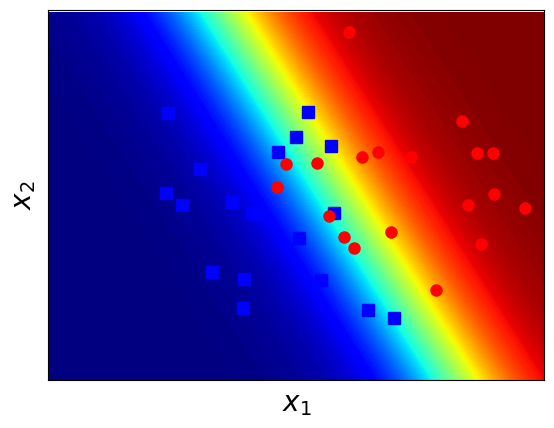

In [25]:
# Make data. 
x1m = np.arange(-1, 6, 0.025) # generate data coord. X1 
xlen = len(x1m) 
x2m = np.arange(0, 4, 0.025)  # generate data coord. X2 
x2en = len(x2m) 
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2) 
 
# now assign the parameter w0, w1, w2 from array w which was computed above 
w0 = w[-1][0][0] 
w1 = w[-1][1][0] 
w2 = w[-1][2][0] 
 
# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m) 
zm = sigmoid(w0 + w1*x1m + w2*x2m) 
 
# plot contour of prob. zm by the saturation of blue and red 
# more red <=> prob. that data point belong to red class is higher & vise versa 
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet') 
 
# finally, plot the data and take a look 
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1) 
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1) 
plt.axis('equal') 
plt.ylim(0, 4) 
plt.xlim(0, 5) 
 
# hide tikcs  
cur_axes = plt.gca() 
cur_axes.axes.get_xaxis().set_ticks([]) 
cur_axes.axes.get_yaxis().set_ticks([]) 
 
plt.xlabel('$x_1$', fontsize = 20) 
plt.ylabel('$x_2$', fontsize = 20) 
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300) 
plt.show()


## Ví dụ 3 (Bài tập 1): 

In [26]:
import numpy as np
from pandas import *
from sklearn.linear_model import LogisticRegression

np.random.seed(2)

In [27]:
# load data
data = read_csv("Admission_Predict.csv")

gre = data['GRE Score'].to_list()
toelf = data['TOEFL Score'].tolist()
unirating = data['University Rating'].tolist()
sop = data['SOP'].tolist()
lor = data['LOR '].tolist()
cgpa = data['CGPA'].tolist()
research = data['Research'].tolist()
c_o_admit = data['Chance of Admit'].tolist()

X1 = np.asarray(gre)
X2 = np.asarray(toelf)
X3 = np.asarray(unirating)
X4 = np.asarray(sop)
X5 = np.asarray(lor)
X6 = np.asarray(cgpa)
X7 = np.asarray(research)
y = np.asarray(c_o_admit)
y01 = []
for i in y:
    if i >=0.75:
        y01.append(1)
    else:
        y01.append(0)
y01 = np.asarray(y01)
print(y01)


[1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1]


In [28]:
# train set
x1_train = []
x2_train = []
x3_train = []
x4_train = []
x5_train = []
x6_train = []
x7_train = []

y_train = []

for i in range(350):
    x1_train.append([X1[i]])
    x2_train.append([X2[i]])
    x3_train.append([X3[i]])
    x4_train.append([X4[i]])
    x5_train.append([X5[i]])
    x6_train.append([X6[i]])
    x7_train.append([X7[i]])
    y_train.append(y01[i])


x1_train = np.asarray(x1_train)
x2_train = np.asarray(x2_train)
x3_train = np.asarray(x3_train)
x4_train = np.asarray(x4_train)
x5_train = np.asarray(x5_train)
x6_train = np.asarray(x6_train)
x7_train = np.asarray(x7_train)
y_train = np.asarray(y_train)

print(y_train)


[1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0]


In [30]:
# test set
x1_test = []
x2_test = []
x3_test = []
x4_test = []
x5_test = []
x6_test = []
x7_test = []

y_test = []

for i in range(350, len(X1)):
    x1_test.append([X1[i]])
    x2_test.append([X2[i]])
    x3_test.append([X3[i]])
    x4_test.append([X4[i]])
    x5_test.append([X5[i]])
    x6_test.append([X6[i]])
    x7_test.append([X7[i]])
    y_test.append(y01[i])

x1_test = np.asarray(x1_test)
x2_test = np.asarray(x2_test)
x3_test = np.asarray(x3_test)
x4_test = np.asarray(x4_test)
x5_test = np.asarray(x5_test)
x6_test = np.asarray(x6_test)
x7_test = np.asarray(x7_test)
y_test = np.asarray(y_test)

In [32]:
# X_train
X_train = np.concatenate(
    (x1_train, x2_train, x3_train, x4_train, x5_train, x6_train, x7_train), axis=1)
print(X_train)

[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [299.    94.     1.   ...   1.     7.34   0.  ]
 [302.    99.     1.   ...   2.     7.25   0.  ]
 [313.   101.     3.   ...   3.     8.04   0.  ]]


In [33]:
# Xbar_train
one_col_train = np.ones((X_train.shape[0], 1))
Xbar_train = np.concatenate((one_col_train, X_train), axis=1)
print(Xbar_train)

[[  1.   337.   118.   ...   4.5    9.65   1.  ]
 [  1.   324.   107.   ...   4.5    8.87   1.  ]
 [  1.   316.   104.   ...   3.5    8.     1.  ]
 ...
 [  1.   299.    94.   ...   1.     7.34   0.  ]
 [  1.   302.    99.   ...   2.     7.25   0.  ]
 [  1.   313.   101.   ...   3.     8.04   0.  ]]


In [34]:
# X_test
X_test = np.concatenate((x1_test, x2_test, x3_test, x4_test, x5_test, x6_test, x7_test), axis=1)
print(X_test)

[[318.   107.     3.     3.     3.5    8.27   1.  ]
 [325.   110.     4.     3.5    4.     8.67   1.  ]
 [303.   100.     2.     3.     3.5    8.06   1.  ]
 [300.   102.     3.     3.5    2.5    8.17   0.  ]
 [297.    98.     2.     2.5    3.     7.67   0.  ]
 [317.   106.     2.     2.     3.5    8.12   0.  ]
 [327.   109.     3.     3.5    4.     8.77   1.  ]
 [301.   104.     2.     3.5    3.5    7.89   1.  ]
 [314.   105.     2.     2.5    2.     7.64   0.  ]
 [321.   107.     2.     2.     1.5    8.44   0.  ]
 [322.   110.     3.     4.     5.     8.64   1.  ]
 [334.   116.     4.     4.     3.5    9.54   1.  ]
 [338.   115.     5.     4.5    5.     9.23   1.  ]
 [306.   103.     2.     2.5    3.     8.36   0.  ]
 [313.   102.     3.     3.5    4.     8.9    1.  ]
 [330.   114.     4.     4.5    3.     9.17   1.  ]
 [320.   104.     3.     3.5    4.5    8.34   1.  ]
 [311.    98.     1.     1.     2.5    7.46   0.  ]
 [298.    92.     1.     2.     2.     7.88   0.  ]
 [301.    98

In [35]:
# Xbar_test
one_col_test = np.ones((X_test.shape[0], 1))
Xbar_test = np.concatenate((one_col_test, X_test), axis=1)
print(Xbar_test)

[[  1.   318.   107.     3.     3.     3.5    8.27   1.  ]
 [  1.   325.   110.     4.     3.5    4.     8.67   1.  ]
 [  1.   303.   100.     2.     3.     3.5    8.06   1.  ]
 [  1.   300.   102.     3.     3.5    2.5    8.17   0.  ]
 [  1.   297.    98.     2.     2.5    3.     7.67   0.  ]
 [  1.   317.   106.     2.     2.     3.5    8.12   0.  ]
 [  1.   327.   109.     3.     3.5    4.     8.77   1.  ]
 [  1.   301.   104.     2.     3.5    3.5    7.89   1.  ]
 [  1.   314.   105.     2.     2.5    2.     7.64   0.  ]
 [  1.   321.   107.     2.     2.     1.5    8.44   0.  ]
 [  1.   322.   110.     3.     4.     5.     8.64   1.  ]
 [  1.   334.   116.     4.     4.     3.5    9.54   1.  ]
 [  1.   338.   115.     5.     4.5    5.     9.23   1.  ]
 [  1.   306.   103.     2.     2.5    3.     8.36   0.  ]
 [  1.   313.   102.     3.     3.5    4.     8.9    1.  ]
 [  1.   330.   114.     4.     4.5    3.     9.17   1.  ]
 [  1.   320.   104.     3.     3.5    4.5    8.34   1. 

In [36]:
# sigmoid
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [37]:
# logistic_sigmoid_resgession method
def logistic_sigmoid_resgession(X, y, w_init, eta, tol = np.e - 4, max_count = 10000):
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = N
    while count < max_count:
        mid_id = np.random.permutation(N)
        for i in mid_id:
            xi = X[:, i].reshape(d,1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta * (yi - zi) * xi
            count +=1

            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [38]:
eta = 0.75
d = Xbar_train.shape[1]
w_init = np.random.randn(d,1)

w = logistic_sigmoid_resgession(Xbar_train.T, y_train, w_init, eta)
print(w[-1])

[[  -88.15996783]
 [-1171.79556582]
 [ 3221.29073589]
 [ 2198.40388737]
 [ 1681.22322251]
 [ 1373.17831877]
 [  690.50265171]
 [  813.2547312 ]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_10844\2203555858.py:3: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-z))


In [39]:
y_predict = sigmoid(np.dot(w[-1].T, Xbar_test.T))
print(y_predict)


[[0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
  0. 1.]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_10844\2203555858.py:3: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-z))


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix, precision_score, accuracy_score
modelsk = LogisticRegression()
modelsk.fit(Xbar_train, y_train)
modelsk.predict(Xbar_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1])

In [41]:
y_predict_sk = modelsk.predict(Xbar_test)
print('Precision: %.3f' % precision_score(y_test, y_predict_sk))
print('Recall: %.3f' % recall_score(y_test, y_predict_sk))
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict_sk))

Precision: 0.944
Recall: 0.773
Accuracy: 0.880


In [42]:
from sklearn.linear_model import LinearRegression

modelli = LinearRegression()
modelli.fit(Xbar_train, y_train)
modelli.predict(np.round(Xbar_test))

array([ 3.48086441e-01,  7.59435684e-01,  1.76434285e-01,  5.49578056e-02,
       -7.55670777e-02,  1.03086685e-01,  7.01948814e-01,  2.32595800e-01,
        9.11561524e-03,  5.25226522e-02,  7.26670969e-01,  1.11034600e+00,
        9.44887848e-01, -1.16811347e-03,  5.92170725e-01,  7.72986887e-01,
        3.66721080e-01, -4.16796489e-01, -2.12478526e-01,  2.45289132e-02,
       -2.22495529e-02,  6.60424352e-01,  1.14133793e+00,  6.07157071e-01,
        1.31295715e-02, -6.16426337e-02, -3.96870368e-01, -1.83352804e-01,
       -1.46480715e-01,  7.23231475e-02,  6.43605675e-01,  6.05647736e-01,
        7.55421727e-01,  8.03522507e-02,  1.18217373e+00,  1.25058275e+00,
        4.60398290e-03,  5.52924504e-02, -1.24372970e-01,  3.97339766e-01,
       -1.38483994e-02,  3.96680170e-01,  7.78758983e-01,  3.53067500e-01,
        7.83146180e-01,  6.97561617e-01,  6.45040817e-01,  8.59004235e-01,
        4.53911164e-01,  1.14755746e+00])

## Ví dụ 4 (Bài tập 2) 

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB

In [58]:
data = pd.read_csv("banking.csv")

In [59]:
dict_month = {'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 
             'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12} 
data['month'] = data['month'].map(dict_month) 
 
# convert field of dayOfweek 
dict_day = {'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6, 
             'sat' : 7} 
data['day_of_week'] = data['day_of_week'].map(dict_day) 
 
# conver binary fields 
#default : 
data.default.replace({'no' : 0, 'yes' : 1}, inplace = True) 
#housing : 
data.housing.replace({'no' : 0, 'yes' : 1}, inplace = True) 
#loan : 
data.loan.replace({'no' : 0, 'yes' : 1}, inplace = True) 
 
# convert categories field by one host coding 
marital_dummies = pd.get_dummies(data['marital'], prefix = 'marital') 
marital_dummies.drop('marital_divorced', axis=1, inplace=True) 
data = pd.concat([data, marital_dummies], axis=1) 
 
job_dummies = pd.get_dummies(data['job'], prefix = 'job') 
job_dummies.drop('job_unknown', axis=1, inplace=True) 
data= pd.concat([data, job_dummies], axis=1) 
 
education_dummies = pd.get_dummies(data['education'], prefix = 'education') 
education_dummies.drop('education_unknown', axis=1, inplace=True) 
data = pd.concat([data, education_dummies], axis=1) 
 
contact_dummies = pd.get_dummies(data['contact'], prefix = 'contact') 
#contact_dummies.drop('contact_unknown', axis=1, inplace=True) 
data = pd.concat([data, contact_dummies], axis=1) 
 
poutcome_dummies = pd.get_dummies(data['poutcome'], prefix = 'poutcome') 
#poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True) 
data = pd.concat([data, poutcome_dummies], axis=1) 

data['pdays'] = data['pdays'].apply(lambda row: 0 if row == -1 else 1) 
 
data.drop(['job', 'education', 'marital', 'contact', 'poutcome'], axis=1,inplace=True)

In [60]:
X1 = data['age']
X2 = job_dummies
X3 = marital_dummies
X4 = education_dummies
X5 = data['default']
X6 = data['housing']
X7 = data['loan']
X8 = contact_dummies
X9 = data['month']
X10 = data['day_of_week']
X11 = data['duration']
X12 = data['campaign']
X13 = data['pdays']
X14 = data['previous']
X15 = poutcome_dummies
y = data['y']

X1 = np.asarray([X1]).T
X2 = np.asarray(X2)
X3 = np.asarray(X3)
X4 = np.asarray(X4)
X5 = np.asarray([X5]).T
X6 = np.asarray([X6]).T
X7 = np.asarray([X7]).T
X8 = np.asarray(X8)
X9 = np.asarray([X9]).T
X10 = np.asarray([X10]).T
X11 = np.asarray([X11]).T
X12 = np.asarray([X12]).T
X13 = np.asarray([X13]).T
X14 = np.asarray([X14]).T
X15 = np.asarray(X15)

y = np.asarray([y]).T
print(len(y))


41188


In [61]:
X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15), axis=1)
X1 = []
y1 = []
for row in range(X.shape[0]):
    if 'unknown' not in X[row]:
        X1.append(X[row])
        y1.append(y[row])
X1 = np.asarray(X1)
print(X1)


[[53 0 0 ... 0 1 0]
 [28 0 0 ... 0 0 1]
 [39 0 0 ... 0 1 0]
 ...
 [24 1 0 ... 1 0 0]
 [48 0 0 ... 0 1 0]
 [25 0 0 ... 0 1 0]]


In [62]:
# devide into 2 part: test_data , train_data
x_train, x_test, y_train, y_test = train_test_split(X1, y1, train_size= 0.8 , shuffle= True)
print(x_train)

[[29 0 0 ... 0 0 1]
 [50 0 0 ... 0 1 0]
 [50 0 1 ... 0 1 0]
 ...
 [47 0 0 ... 0 1 0]
 [37 1 0 ... 0 1 0]
 [42 0 0 ... 0 1 0]]


In [63]:
# Xbar_train
one_col_train = np.ones([x_train.shape[0], 1])
Xbar_train = np.concatenate((one_col_train, x_train), axis= 1)
print(Xbar_train)

[[1.0 29 0 ... 0 0 1]
 [1.0 50 0 ... 0 1 0]
 [1.0 50 0 ... 0 1 0]
 ...
 [1.0 47 0 ... 0 1 0]
 [1.0 37 1 ... 0 1 0]
 [1.0 42 0 ... 0 1 0]]


In [64]:
# Xbar_test
one_col_test = np.ones([x_test.shape[0], 1])
Xbar_test = np.concatenate((one_col_test, x_test), axis= 1)
print(Xbar_test)

[[1.0 31 0 ... 0 1 0]
 [1.0 40 1 ... 0 1 0]
 [1.0 33 0 ... 0 1 0]
 ...
 [1.0 36 1 ... 0 1 0]
 [1.0 37 0 ... 0 1 0]
 [1.0 26 0 ... 0 1 0]]


In [65]:
# using Logistics()
modello = LogisticRegression()
modello.fit(Xbar_train, y_train)
y_pred_lo = modello.predict(Xbar_test)

	
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_lo))
print('Recall: %.3f' % recall_score(y_test, y_pred_lo))
print('Precision: %.3f' % precision_score(y_test, y_pred_lo))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_lo))

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.884
Recall: 0.312
Precision: 0.648
F1 Score: 0.421


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
modelmul = MultinomialNB()
modelmul.fit(Xbar_train, y_train)
y_pred_mul= modelmul.predict(Xbar_test)

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_mul))
print('Recall: %.3f' % recall_score(y_test, y_pred_mul))
print('Precision: %.3f' % precision_score(y_test, y_pred_mul))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_mul))

Accuracy: 0.795
Recall: 0.631
Precision: 0.355
F1 Score: 0.454


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Ví dụ 5 (Bài tập 3): 

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix, precision_score, accuracy_score

np.random.seed(2)

In [45]:
# load data
data = pd.read_csv("framingham.csv")
data.head()
data.isnull().sum()
data = data.dropna(how ='any', axis=0)
data.describe()

x1 = np.asarray([data['male']])
x2 = np.asarray([data['age']])
x3 = np.asarray([data['education']])
x4 = np.asarray([data['currentSmoker']])
x5 = np.asarray([data['cigsPerDay']])
x6 = np.asarray([data['BPMeds']])
x7 = np.asarray([data['prevalentStroke']])
x8 = np.asarray([data['prevalentHyp']])
x9 = np.asarray([data['diabetes']])
x10 = np.asarray([data['totChol']])
x11 = np.asarray([data['sysBP']])
x12 = np.asarray([data['diaBP']])
x13 = np.asarray([data['BMI']])
x14 = np.asarray([data['heartRate']])
x15 = np.asarray([data['glucose']])

y = np.asarray(data['TenYearCHD'])
print(y)


[0 0 0 ... 1 0 0]


In [46]:
# devide data into 2 part, tran_set: test_set = 7: 3
size = x1.shape[1]

x1_train = []
x2_train = []
x3_train = []
x4_train = []
x5_train = []
x6_train = []
x7_train = []
x8_train = []
x9_train = []
x10_train = []
x11_train = []
x12_train = []
x13_train = []
x14_train = []
x15_train = []
y_train = []
for i in range(int(np.round(size/100 * 70))):
    x1_train.append([x1[0][i]])
    x2_train.append([x2[0][i]])
    x3_train.append([x3[0][i]])
    x4_train.append([x4[0][i]])
    x5_train.append([x5[0][i]])
    x6_train.append([x6[0][i]])
    x7_train.append([x7[0][i]])
    x8_train.append([x8[0][i]])
    x9_train.append([x9[0][i]])
    x10_train.append([x10[0][i]])
    x11_train.append([x11[0][i]])
    x12_train.append([x12[0][i]])
    x13_train.append([x13[0][i]])
    x14_train.append([x14[0][i]])
    x15_train.append([x15[0][i]])
    y_train.append(y[i])

y_train = np.asarray(y_train)
X_train = np.concatenate((x1_train, x2_train, x3_train, x4_train, x5_train, x6_train, x7_train, x8_train, x9_train, x10_train, x11_train, x12_train, x13_train, x14_train, x15_train), axis=1)
print(y_train)
print(len(X_train))



[0 0 0 ... 0 1 0]
2559


In [47]:
x1_test = []
x2_test = []
x3_test = []
x4_test = []
x5_test = []
x6_test = []
x7_test = []
x8_test = []
x9_test = []
x10_test = []
x11_test = []
x12_test = []
x13_test = []
x14_test = []
x15_test = []
y_test = []


for i in range(int(np.round(size/100 * 70)), size):
    x1_test.append([x1[0][i]])
    x2_test.append([x2[0][i]])
    x3_test.append([x3[0][i]])
    x4_test.append([x4[0][i]])
    x5_test.append([x5[0][i]])
    x6_test.append([x6[0][i]])
    x7_test.append([x7[0][i]])
    x8_test.append([x8[0][i]])
    x9_test.append([x9[0][i]])
    x10_test.append([x10[0][i]])
    x11_test.append([x11[0][i]])
    x12_test.append([x12[0][i]])
    x13_test.append([x13[0][i]])
    x14_test.append([x14[0][i]])
    x15_test.append([x15[0][i]])
    y_test.append(y[i])

X_test = np.concatenate((x1_test, x2_test, x3_test, x4_test, x5_test, x6_test, x7_test, x8_test, x9_test, x10_test, x11_test, x12_test, x13_test, x14_test, x15_test), axis=1)
print(X_test)
print(len(X_test))


[[  0.    45.     2.   ...  23.46  85.    90.  ]
 [  0.    48.     4.   ...  25.5   85.    79.  ]
 [  1.    50.     1.   ...  28.26  68.    94.  ]
 ...
 [  1.    50.     1.   ...  25.97  66.    86.  ]
 [  1.    51.     3.   ...  19.71  65.    68.  ]
 [  0.    52.     2.   ...  21.47  80.   107.  ]]
1097


In [48]:
print(y_test)

[0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [49]:
print(y_test)

[0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [50]:
# Xbar
one_col_train = np.ones((X_train.shape[0], 1))
Xbar_train = np.concatenate((one_col_train, X_train), axis=1)
print(Xbar_train)

[[  1.     1.    39.   ...  26.97  80.    77.  ]
 [  1.     0.    46.   ...  28.73  95.    76.  ]
 [  1.     1.    48.   ...  25.34  75.    70.  ]
 ...
 [  1.     1.    36.   ...  25.23  75.    63.  ]
 [  1.     1.    50.   ...  29.38  79.   106.  ]
 [  1.     1.    42.   ...  28.09  70.    70.  ]]


In [51]:
one_col_test = np.ones((X_test.shape[0], 1))
Xbar_test = np.concatenate((one_col_test, X_test), axis= 1)
print(Xbar_test)

[[  1.     0.    45.   ...  23.46  85.    90.  ]
 [  1.     0.    48.   ...  25.5   85.    79.  ]
 [  1.     1.    50.   ...  28.26  68.    94.  ]
 ...
 [  1.     1.    50.   ...  25.97  66.    86.  ]
 [  1.     1.    51.   ...  19.71  65.    68.  ]
 [  1.     0.    52.   ...  21.47  80.   107.  ]]


In [52]:
# sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [53]:
# logistic_sigmoid_resgession method
def logistic_sigmoid_resgession(X, y, w_init, eta, tol = np.e - 4, max_count = 10000):
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = N
    while count < max_count:
        mid_id = np.random.permutation(N)
        for i in mid_id:
            xi = X[:, i].reshape(d,1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta * (yi - zi) * xi
            count +=1

            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [54]:
eta = 0.05
d = Xbar_train.shape[1]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_resgession(Xbar_train.T, y_train, w_init, eta)
print(w[-1])


[[ -3.99627366]
 [  5.64708239]
 [ 41.69821783]
 [-18.34087168]
 [ -4.23995263]
 [ 27.17821493]
 [  1.27416941]
 [ -0.72400635]
 [  7.50594249]
 [  0.57414767]
 [ -3.75310467]
 [ 38.19528226]
 [-45.18228156]
 [-25.23435277]
 [-52.16733203]
 [ 33.42626564]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_10844\3468915085.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [55]:
y_predict = sigmoid(np.dot(w[-1].T, Xbar_test.T))
print(y_predict)

[[1. 0. 1. ... 1. 1. 1.]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_10844\3468915085.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [56]:
modelsk = LogisticRegression()
modelsk.fit(Xbar_train, y_train)
y_predict_sk = modelsk.predict(Xbar_test)
cm = confusion_matrix(y_predict_sk, y_test)
print(cm)
print('Precision: %.3f' % precision_score(y_test, y_predict_sk))
print('Recall: %.3f' % recall_score(y_test, y_predict_sk))
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict_sk))

[[927 160]
 [  4   6]]
Precision: 0.600
Recall: 0.036
Accuracy: 0.851


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
